### Task 1

##### This program takes a positive floating-point number as input and outputs an approximation of its square root.

In [ ]:
def sqrt(number):
    a = float(number) # number to get square root of
    diff = 99999999   # set a big number as difference
    while diff > 0.05: # iterate until difference between original number and squrare of guessed number is less than 0.05
        number = 0.5 * (number + a / number) # update using newtowns method x_(n+1) = 0.5 * (x_n +a / x_n)
        diff = abs(number**2-a)
    return number

num = float(input("Please enter a positive number:"))
sqroot = sqrt(num)
print("The square root of {} is approx. {:.1f}".format(num, sqroot))

### Task 2

### chi-squared test

In [25]:
# Import pandas
import pandas as pd

# Import scipy
import scipy.stats as ss

In [34]:
# Coffee drinkers who prefer chocolate
coffee_chocolate = [['Coffee', 'Chocolate']] * 43

# Show.
coffee_chocolate

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [27]:
# Coffee drinkers who prefer Plain
coffee_plain = [['Coffee', 'Plain']] * 57

# Show.
coffee_plain

[['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee'

In [35]:
# Tea drinkers who prefer chocolate
tea_chocolate = [['Tea', 'Chocolate']] * 56

# Show.
tea_chocolate

[['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'C

In [29]:
# Tea drinkers who prefer Plain
tea_plain = [['Tea', 'Plain']] * 45

# Show.
tea_plain

[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain']]

In [36]:
# Raw data, merge the four lists.
raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain

# Show.
raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [31]:
# To create column and rows for the df
drink, biscuit = list(zip(*raw_data))

# Show.
drink, biscuit

(('Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'C

In [32]:
# Create the data frame.
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

# Show.
df

,drink,biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Chocolate
3,Coffee,Chocolate
4,Coffee,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Plain
198,Tea,Plain
199,Tea,Plain


### Contingency Table

In [33]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['drink'], df['biscuit'])

# Show.
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [14]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

In [15]:
# The counts.
cross.count

array([[43, 57],
       [56, 45]])

## Statistical Test

In [16]:
# Do the statistics. Just do them.
result = ss.chi2_contingency(cross.count, correction=False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [17]:
# The expected fequencies if independent.
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

### Result

In [18]:
# The chi-square test of independence shows that there is no significant 
# association between drink preference and biscuit preference, X2 (1, N = 201) = 3.1, p = 0.07.

### Task 3

### t-Test

In [17]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

In [8]:

# Download the penguins data set from GitHub
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [14]:
# Get the body mass for female gentoo
female_gentoo = df.loc[(df["species"] == "Gentoo") & (df["sex"] == "FEMALE")]['body_mass_g'].to_numpy()
female_gentoo

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

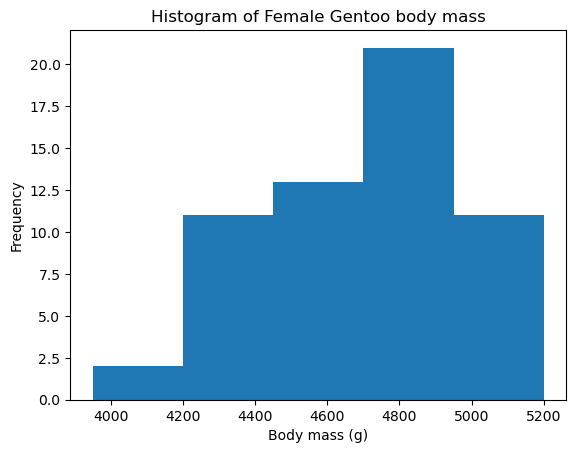

In [42]:
# Create a histogram for female body mass
plt.hist(female_gentoo, bins=5)

# Add labels and title
plt.xlabel('Body mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Female Gentoo body mass')

# Show the histogram
plt.show()

In [15]:
# Get the body mass for male gentoo
male_gentoo = df.loc[(df["species"] == "Gentoo") & (df["sex"] == "MALE")]['body_mass_g'].to_numpy()
male_gentoo

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

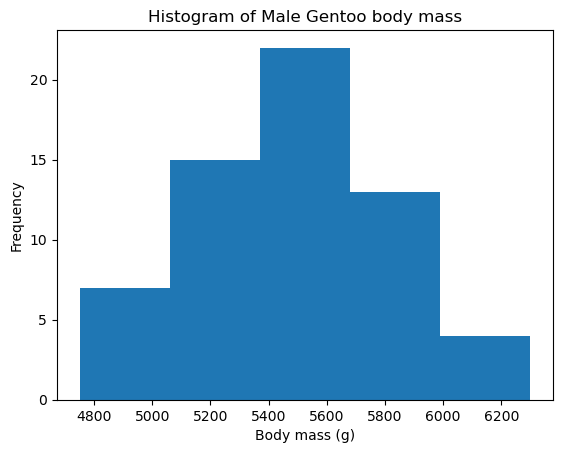

In [43]:
# Create a histogram for male body mass
plt.hist(male_gentoo, bins=5)

# Add labels and title
plt.xlabel('Body mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Male Gentoo body mass')

# Show the histogram
plt.show()

### Running t-test

In [18]:
# t-test.
ss.ttest_ind(female_gentoo, male_gentoo)

Ttest_indResult(statistic=-14.721676481405709, pvalue=2.133687602018886e-28)

In [41]:
# t-statistics indicate that mean body mass of female gentoo penguins is lower than 
# the mean body mass of male gentoo penguins. 
# The magnitude (14) indicate that the diffence is substantial. 
# Because of the high p-value, the null hypotheis can be rejected 
# (i.e there is no significant difference between the two groups),
# which means that there is a significant difference in the body mass between male 
# and female gentoo penguins.